In [2]:
print("ola mundo! _ Parte 2")

ola mundo! _ Parte 2


# Primeira Exploração de Dados

https://archive.ics.uci.edu/dataset/2/adult

In [3]:
# Extrai os dados do zip
!unzip adult.zip -d ./adult

Archive:  adult.zip
  inflating: ./adult/Index           
  inflating: ./adult/adult.data      
  inflating: ./adult/adult.names     
  inflating: ./adult/adult.test      
  inflating: ./adult/old.adult.names  


In [3]:
# Importa as bibliotecas para manipular os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Abre os dados
df = pd.read_csv("./adult/adult.data", header=None)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Cria uma lista com os nomes das colunas
colunas = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]

In [11]:
# Atualiza os nomes das colunas no dataframe
df.columns = colunas

In [13]:
# Verifica como os dados estão organizados
df.shape

(32561, 15)

In [14]:
# Resumo do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
# Verifica quantos valores eu tenho dentro do workclass
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
# Conta a quantidade de instancias
df['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [18]:
# Verifica a quantidade de labels para `workclass`
df['workclass'].nunique()

9

In [19]:
# Pega todas as colunas que forem object
colunas = df.select_dtypes(include='object').columns

In [20]:
colunas

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [21]:
for coluna in colunas:
  print("Coluna:", coluna, " Quantidade:", df[coluna].nunique())

Coluna: workclass  Quantidade: 9
Coluna: education  Quantidade: 16
Coluna: marital-status  Quantidade: 7
Coluna: occupation  Quantidade: 15
Coluna: relationship  Quantidade: 6
Coluna: race  Quantidade: 5
Coluna: sex  Quantidade: 2
Coluna: native-country  Quantidade: 42
Coluna: income  Quantidade: 2


In [22]:
# Converte as colunas selecionadas para o tipo categorias
for coluna in colunas:
  df[coluna] = df[coluna].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education-num   32561 non-null  int64   
 5   marital-status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital-gain    32561 non-null  int64   
 11  capital-loss    32561 non-null  int64   
 12  hours-per-week  32561 non-null  int64   
 13  native-country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [24]:
# Verifica como os dados numéricos estão distribuidos
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


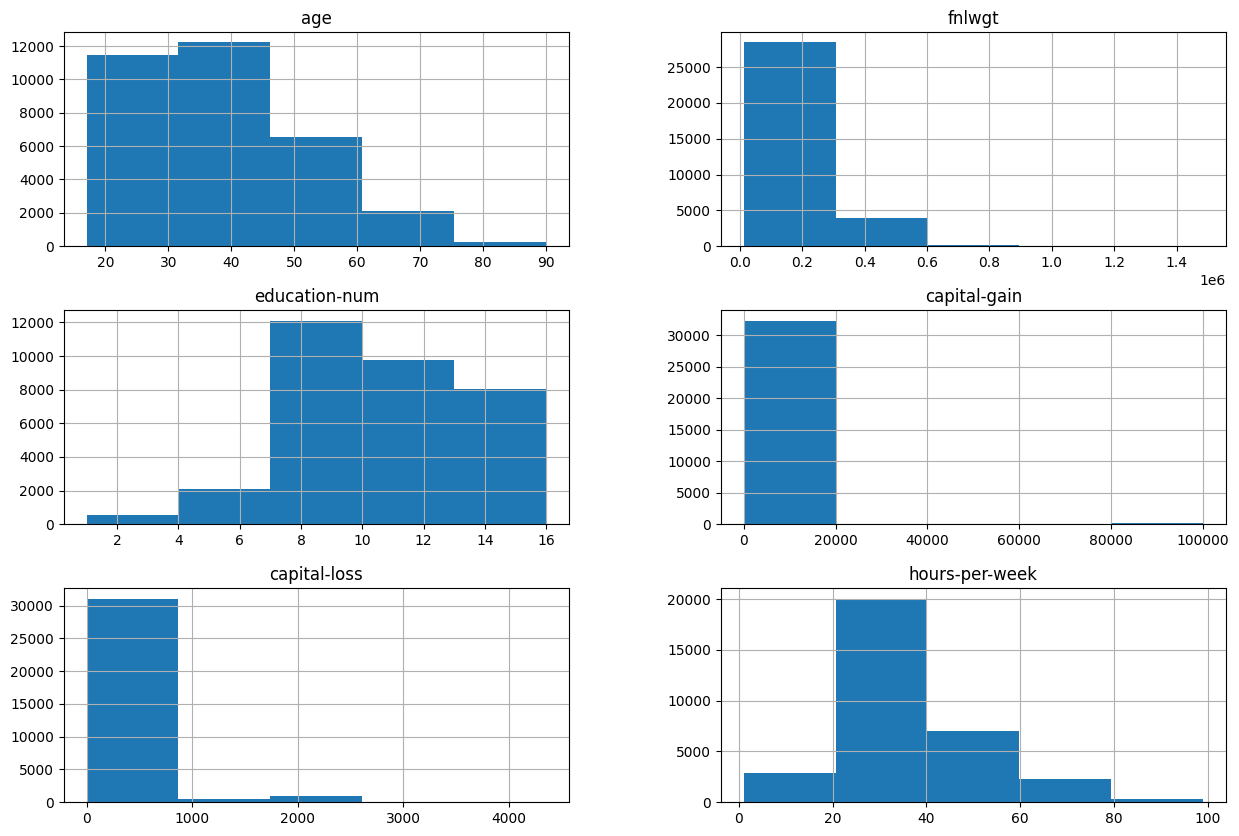

In [26]:
# Plota um histograma dos dados numericos
df.hist(bins=5,figsize=(15, 10))
plt.show()

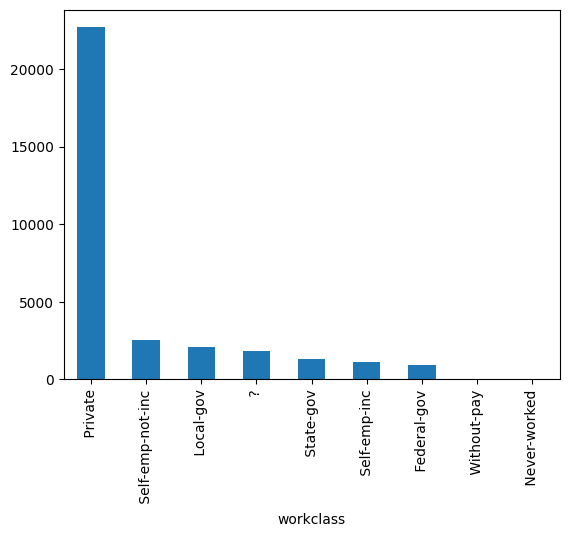

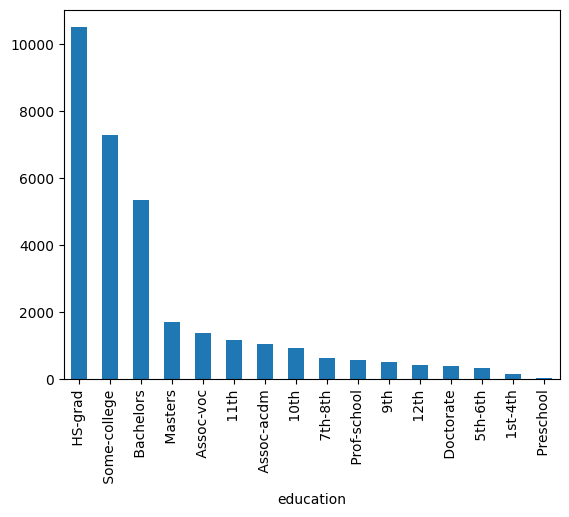

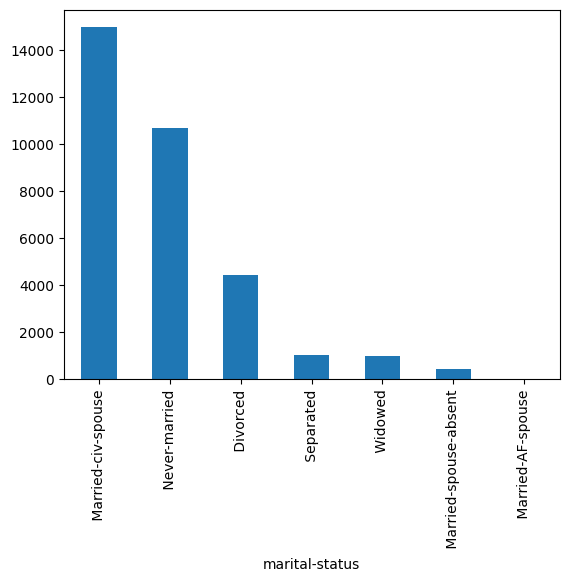

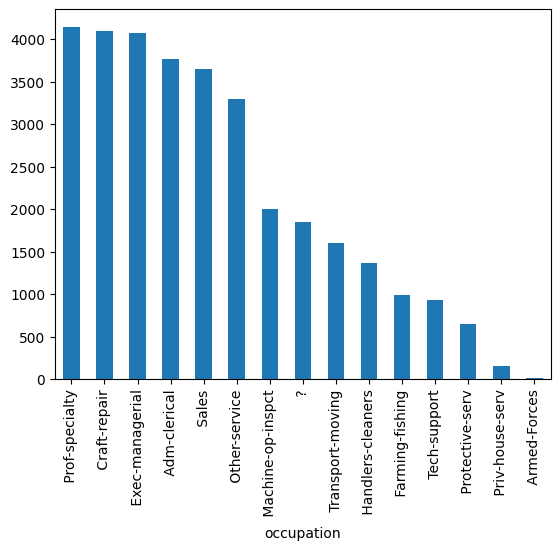

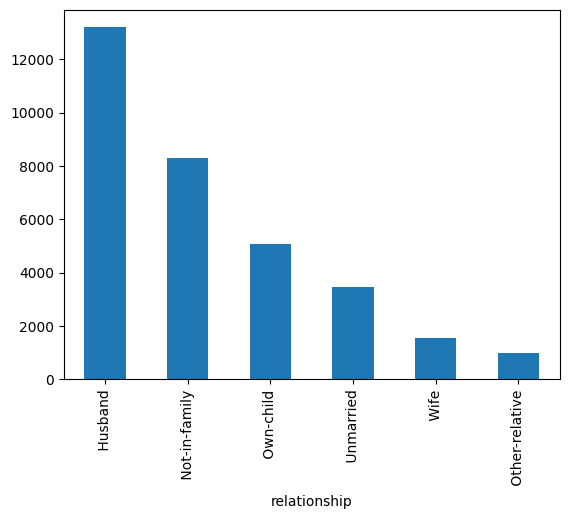

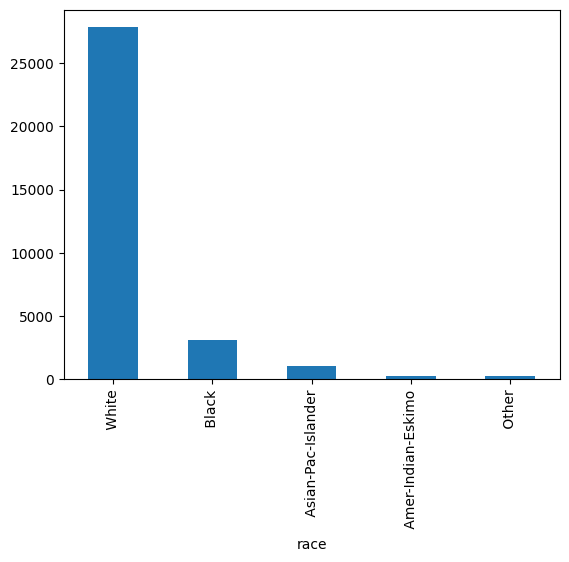

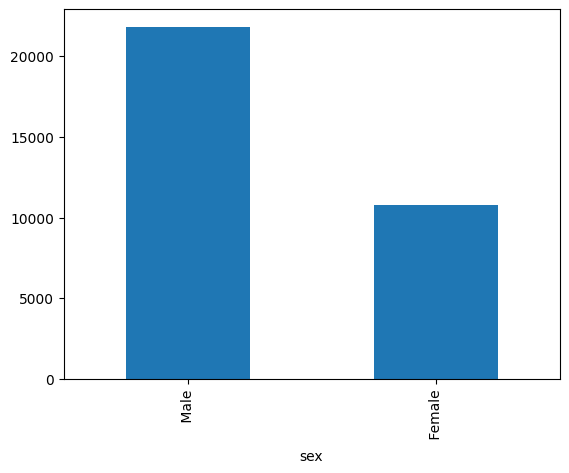

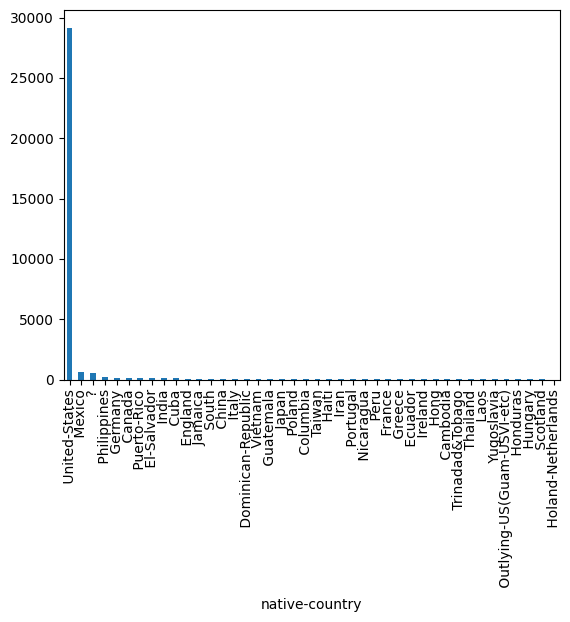

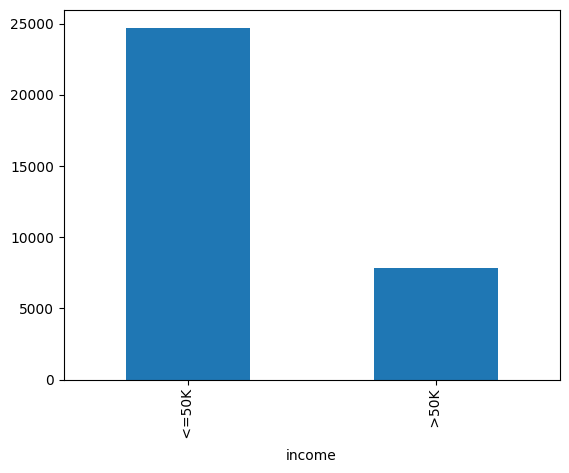

In [27]:
# Utiliza um grafico de barras para exibir a distribuicao dos dados categoricos
for coluna in colunas:
  df[coluna].value_counts().plot(kind='bar')
  plt.show()

## Recomendação de Texto

https://automatetheboringstuff.com/

In [28]:
import zipfile

# Nome do arquivo zip
arquivo_zip = 'adult.zip'

# Diretório para extrair os arquivos
diretorio_destino = './adult_2'

# Abre o arquivo zip
with zipfile.ZipFile(arquivo_zip, 'r') as zip_ref:
    # Extrai todos os conteúdos para o diretório especificado
    zip_ref.extractall(diretorio_destino)

print(f"Arquivo '{arquivo_zip}' descompactado para '{diretorio_destino}' com sucesso.")

Arquivo 'adult.zip' descompactado para './adult_2' com sucesso.


In [ ]:
# Código de referencia para extrair todos os arquivos de um diretório
import os
import zipfile

# Diretório onde os arquivos estão localizados
diretorio_com_zips = './'  # Altere para o diretório onde seus arquivos zip estão

# Diretório para extrair os arquivos
diretorio_destino = './arquivos_extraidos' # Altere para o diretório onde você quer extrair

# Cria o diretório de destino se ele não existir
if not os.path.exists(diretorio_destino):
    os.makedirs(diretorio_destino)

# Percorre todos os itens no diretório especificado
for item in os.listdir(diretorio_com_zips):
    caminho_completo = os.path.join(diretorio_com_zips, item)

    # Verifica se o item é um arquivo e se termina com '.zip'
    if os.path.isfile(caminho_completo) and caminho_completo.lower().endswith('.zip'):
        try:
            # Abre o arquivo zip
            with zipfile.ZipFile(caminho_completo, 'r') as zip_ref:
                # Extrai todos os conteúdos para o diretório de destino
                zip_ref.extractall(diretorio_destino)
            print(f"Arquivo '{item}' descompactado para '{diretorio_destino}' com sucesso.")
        except zipfile.BadZipFile:
            print(f"Erro: O arquivo '{item}' não é um arquivo zip válido.")
        except Exception as e:
            print(f"Erro ao descompactar o arquivo '{item}': {e}")

# Processar informações


## Para quem estiver no próprio computador:

- Criar um ambiente virtual

```sh
# No Windows
python -m venv venv
# Ligando o Ambiente Virtual
.\venv\Scripts\activate
```

- No Linux/Mac

```sh
# No Linux/Mac
python3 -m venv venv
# Ligar o venv
source ./venv/bin/activate
```

In [29]:
# Instalar o PyCaret
!python3 -m pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 65.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.

In [1]:
# Analise com PyCaret
# https://pycaret.org/

# Importa o módulo de classificaçao do PyCaret
from pycaret.classification import *

In [4]:
# Como reiniciou a seção, carregando novamente os dados
df = pd.read_csv("./adult/adult.data", header=None)
# Cria uma lista com os nomes das colunas
colunas = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]
df.columns = colunas

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Configura o experimento que será iniciado
s = setup(df, target='income', session_id=106)


,Description,Value
0,Session id,106
1,Target,income
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(32561, 15)"
5,Transformed data shape,"(32561, 67)"
6,Transformed train set shape,"(22792, 67)"
7,Transformed test set shape,"(9769, 67)"
8,Numeric features,6
9,Categorical features,8


In [12]:
# Treina um conjunto de modelos
s = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8707,0.9264,0.8707,0.8664,0.8670,0.6273,0.6309,1.5070
catboost,CatBoost Classifier,0.8707,0.9275,0.8707,0.8663,0.8668,0.6266,0.6304,7.2260
xgboost,Extreme Gradient Boosting,0.8688,0.9248,0.8688,0.8646,0.8655,0.6242,0.6269,0.5980
gbc,Gradient Boosting Classifier,0.8661,0.9220,0.8661,0.8608,0.8599,0.6036,0.6115,2.5130
ada,Ada Boost Classifier,0.8599,0.9155,0.8599,0.8543,0.8548,0.5914,0.5964,0.8990
rf,Random Forest Classifier,0.8550,0.9043,0.8550,0.8498,0.8510,0.5832,0.5863,2.0140
lr,Logistic Regression,0.8432,0.8812,0.8432,0.8355,0.8360,0.5358,0.5429,2.7340
lda,Linear Discriminant Analysis,0.8404,0.8923,0.8404,0.8325,0.8335,0.5292,0.5355,0.3360
ridge,Ridge Classifier,0.8380,0.8924,0.8380,0.8291,0.8263,0.5019,0.5170,0.3020
et,Extra Trees Classifier,0.8343,0.8786,0.8343,0.8298,0.8315,0.5320,0.5332,2.1970


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [18]:
type(s[2])

xgboost.sklearn.XGBClassifier

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

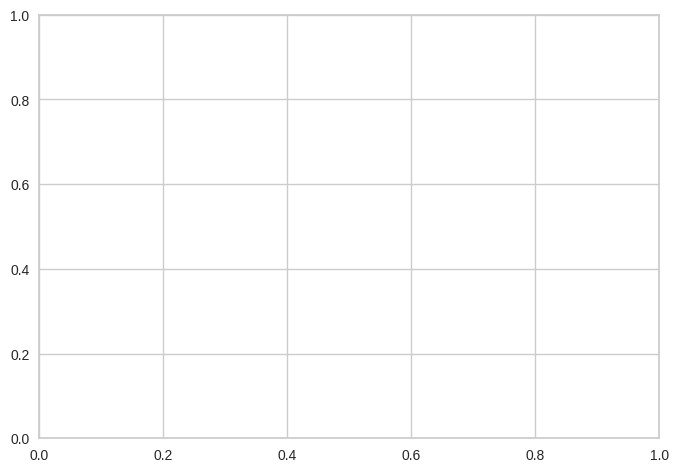

In [14]:
# Verifica o desempenho dos modelos
evaluate_model(s[0])

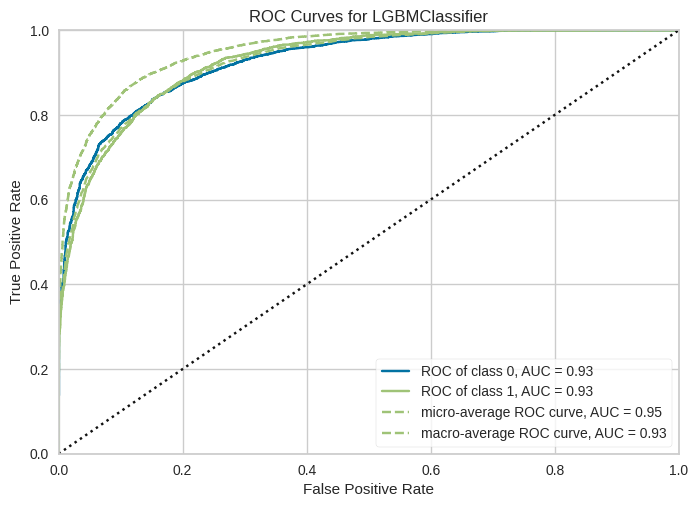

In [19]:
# Plota area sobre a curva do modelo
plot_model(s[0], plot='auc')

In [21]:
print("ola")

ola


In [22]:
# Melhora os parametros do nosso modelo
modelo_tunado = tune_model(s[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8645,0.9161,0.8645,0.8596,0.8605,0.6091,0.6125
1,0.8618,0.9201,0.8618,0.8570,0.8581,0.6031,0.6060
2,0.8749,0.9290,0.8749,0.8705,0.8706,0.6356,0.6405
3,0.8767,0.9311,0.8767,0.8725,0.8727,0.6426,0.6470
4,0.8771,0.9351,0.8771,0.8740,0.8750,0.6528,0.6542
5,0.8640,0.9222,0.8640,0.8588,0.8594,0.6050,0.6094
6,0.8745,0.9335,0.8745,0.8704,0.8712,0.6398,0.6428
7,0.8644,0.9220,0.8644,0.8593,0.8600,0.6070,0.6111
8,0.8662,0.9250,0.8662,0.8612,0.8619,0.6126,0.6166


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Link para Gradio:

https://colab.research.google.com/drive/1Vqm7NQzPu7eGlUC8kpRHig4cY3Yxy-Ov?usp=sharing

In [23]:
# Cria uma interface para o modelo
create_app(modelo_tunado)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dcb74f4d2ef1ba8d7d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [25]:
# Criar uma API
create_api(modelo_tunado, 'modelo_income')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python modelo_income.py


# Link Github

https://github.com/Murilo-ZC/poli-usp-pro-data-mining